In [1]:
pip install jupyterthemes

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [3]:
# Read the dataset and save it in a dataframe
tweet_df = pd.read_csv(r"C:\Users\sasi_\Downloads\twitter.csv")
tweet_df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [4]:
#General information about the dataset
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
#Count of the number of null values in the dataset
tweet_df.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [6]:
#Summary of the data
tweet_df.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [7]:
# Viewing the tweets column
tweet_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [8]:
# Since the id column doesnt contribute to the end use of the project, removing it
tweet_df = tweet_df.drop(['id'], axis = 1)

In [9]:
tweet_df.head()

label                                              tweet
0      0   @user when a father is dysfunctional and is s...
1      0  @user @user thanks for #lyft credit i can't us...
2      0                                bihday your majesty
3      0  #model   i love u take with u all the time in ...
4      0             factsguide: society now    #motivation

Data Exploration

<AxesSubplot:>

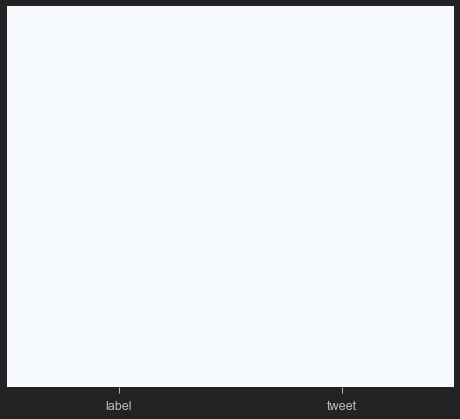

In [10]:
sns.heatmap(tweet_df.isnull(),yticklabels = False,cbar = False, cmap = "Blues")

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

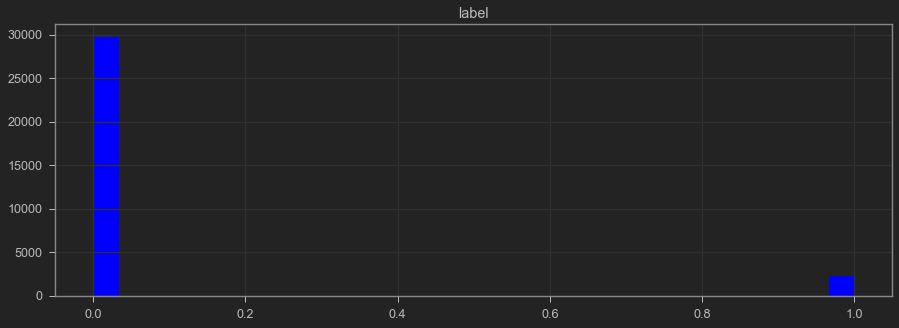

In [11]:
#Plot the histogram
tweet_df.hist(bins=30,figsize = (15,5),color = 'blue')

C:\Users\sasi_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

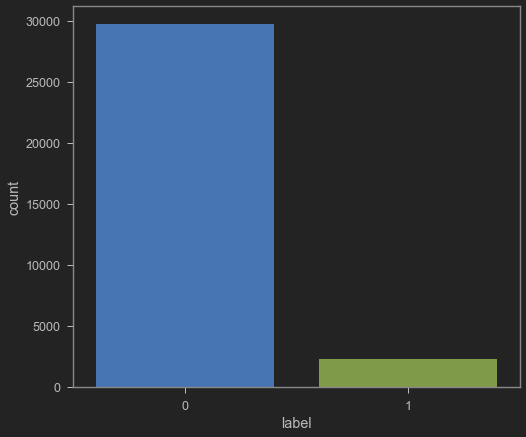

In [12]:
sns.countplot(tweet_df['label'], label = 'Count')

In [13]:
#To find the length of the tweets
tweet_df['length']=tweet_df['tweet'].apply(len)

In [14]:
tweet_df.head()

label                                              tweet  length
0      0   @user when a father is dysfunctional and is s...     102
1      0  @user @user thanks for #lyft credit i can't us...     122
2      0                                bihday your majesty      21
3      0  #model   i love u take with u all the time in ...      86
4      0             factsguide: society now    #motivation      39

In [15]:
tweet_df.describe()

label        length
count  31962.000000  31962.000000
mean       0.070146     84.739628
std        0.255397     29.455749
min        0.000000     11.000000
25%        0.000000     63.000000
50%        0.000000     88.000000
75%        0.000000    108.000000
max        1.000000    274.000000

In [16]:
#To view the shortest tweet
tweet_df[tweet_df['length']==11]

label        tweet  length
25195      0  i love you       11

In [17]:
#To view the longest tweet
tweet_df[tweet_df['length']==274]['tweet']

19770     @user lmfao pathetic #soit   #growup #funny #...
Name: tweet, dtype: object

In [18]:
#To view tweet with mean length
tweet_df[tweet_df['length']==84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

<AxesSubplot:ylabel='Frequency'>

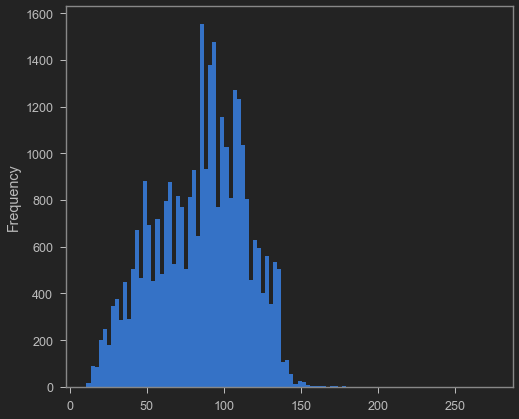

In [19]:
#To plot the histogram of length column
tweet_df['length'].plot(bins=100, kind = 'hist')

In [20]:
positive_tweets = tweet_df[tweet_df['label']==0]
positive_tweets

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31956      0  off fishing tomorrow @user carnt wait first ti...      61
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31961      0                   thank you @user for you follow        32

[29720 rows x 3 columns]

In [21]:
negative_tweets = tweet_df[tweet_df['label']==1]
negative_tweets

label                                              tweet  length
13         1  @user #cnn calls #michigan middle school 'buil...      74
14         1  no comment!  in #australia   #opkillingbay #se...     101
17         1                             retweet if you agree!       22
23         1    @user @user lumpy says i am a . prove it lumpy.      47
34         1  it's unbelievable that in the 21st century we'...     104
...      ...                                                ...     ...
31934      1  lady banned from kentucky mall. @user  #jcpenn...      59
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...      82
31947      1  @user @user you don't have the balls to hashta...     112
31948      1   makes you ask yourself, who am i? then am i a...      87
31960      1  @user #sikh #temple vandalised in in #calgary,...      67

[2242 rows x 3 columns]

In [22]:
#Converting the tweets to a single list
sentences = tweet_df['tweet'].tolist()
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [23]:
len(sentences)

31962

In [24]:
sentences_as_string = " ".join(sentences)

In [25]:
sentences_as_string

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

In [26]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [27]:
from wordcloud import WordCloud

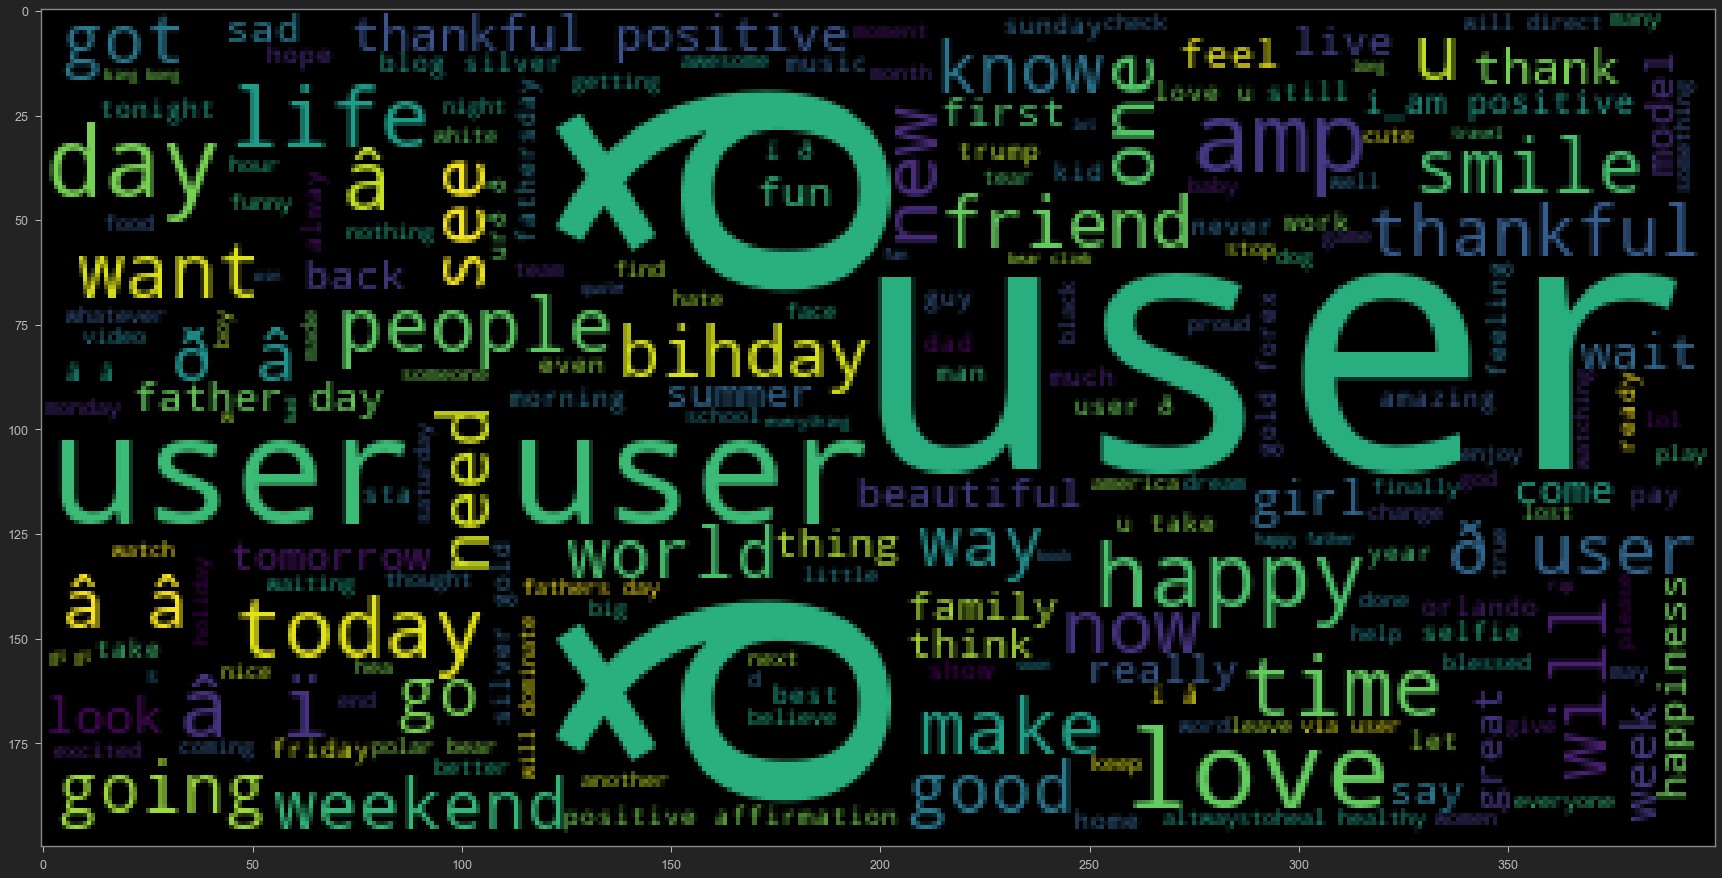

In [28]:
plt.figure(figsize = (30,30))
plt.imshow(WordCloud().generate(sentences_as_string))

In [29]:
neg_tweets_list= negative_tweets['tweet'].tolist()
neg_tweets_sentences = " ".join(neg_tweets_list)
neg_tweets_sentences

'@user #cnn calls #michigan middle school \'build the wall\' chant \'\' #tcot   no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins retweet if you agree!  @user @user lumpy says i am a . prove it lumpy. it\'s unbelievable that in the 21st century we\'d need something like this. again. #neverump  #xenophobia  @user lets fight against  #love #peace  ð\x9f\x98©the white establishment can\'t have blk folx running around loving themselves and promoting our greatness   @user hey, white people: you can call people \'white\' by @user  #race  #identity #medâ\x80¦ how the #altright uses  &amp; insecurity to lure men into #whitesupremacy     @user i\'m not interested in a #linguistics that doesn\'t address #race &amp; . racism is about #power. #raciolinguistics bringsâ\x80¦ @user why not @user mocked obama for being black.  @user @user @user @user #brexit #people aren\'t protesting #trump because a #republican won-they do so because trump has fuhe

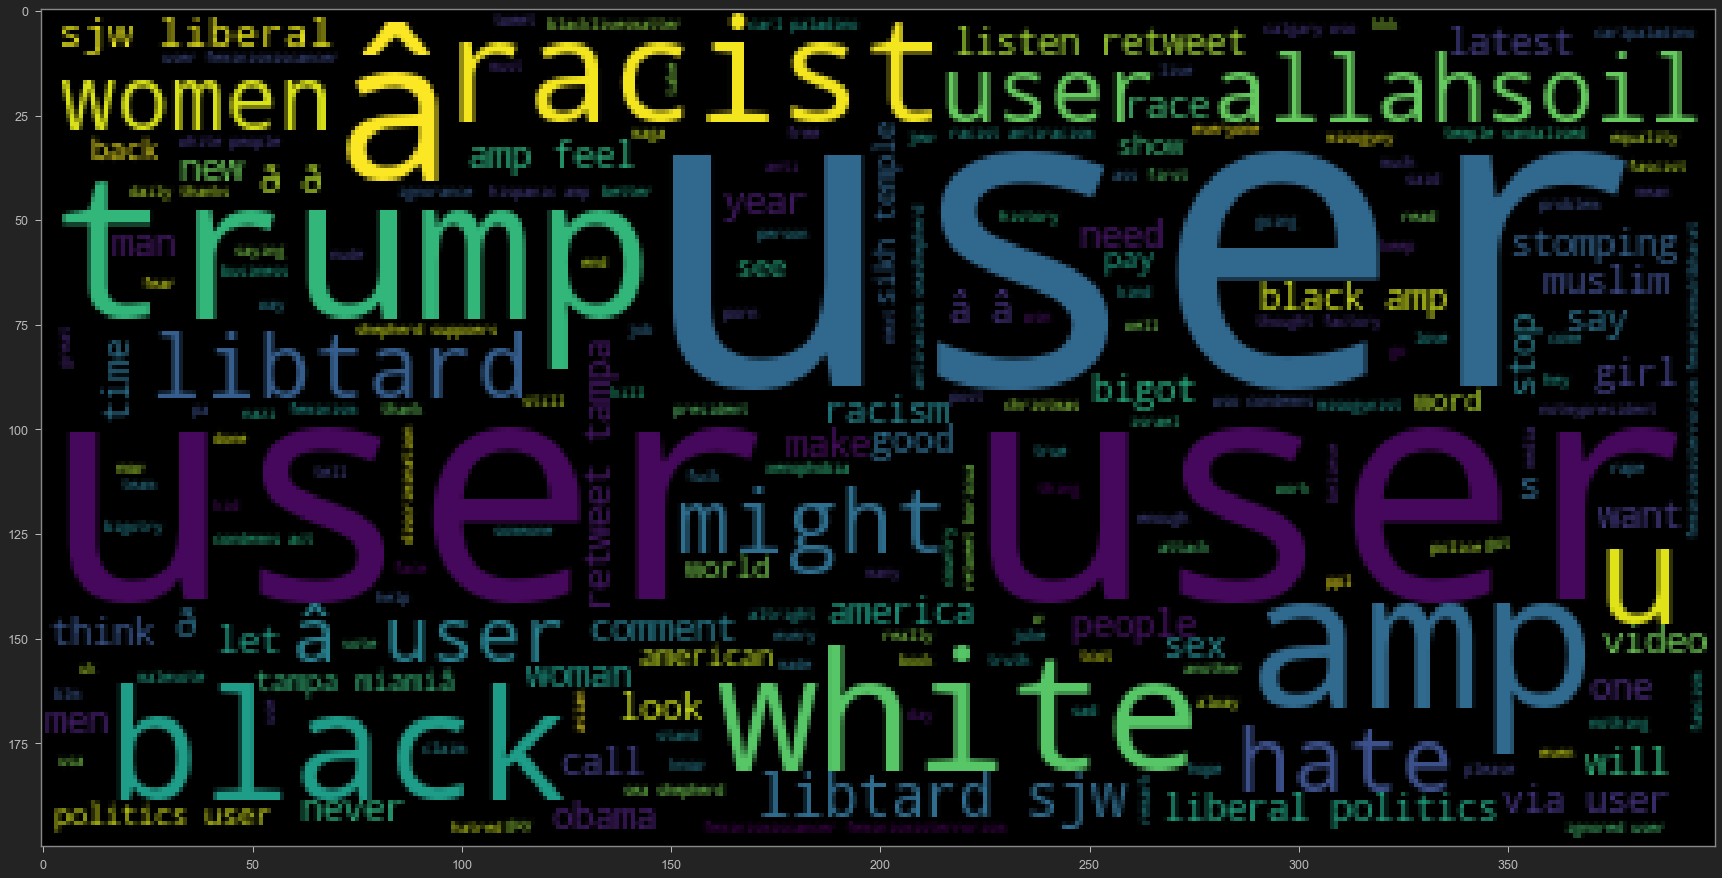

In [30]:
plt.figure(figsize = (30,30))
plt.imshow(WordCloud().generate(neg_tweets_sentences))

In [31]:
pos_tweets_list= positive_tweets['tweet'].tolist()
pos_tweets_sentences = " ".join(pos_tweets_list)
pos_tweets_sentences

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

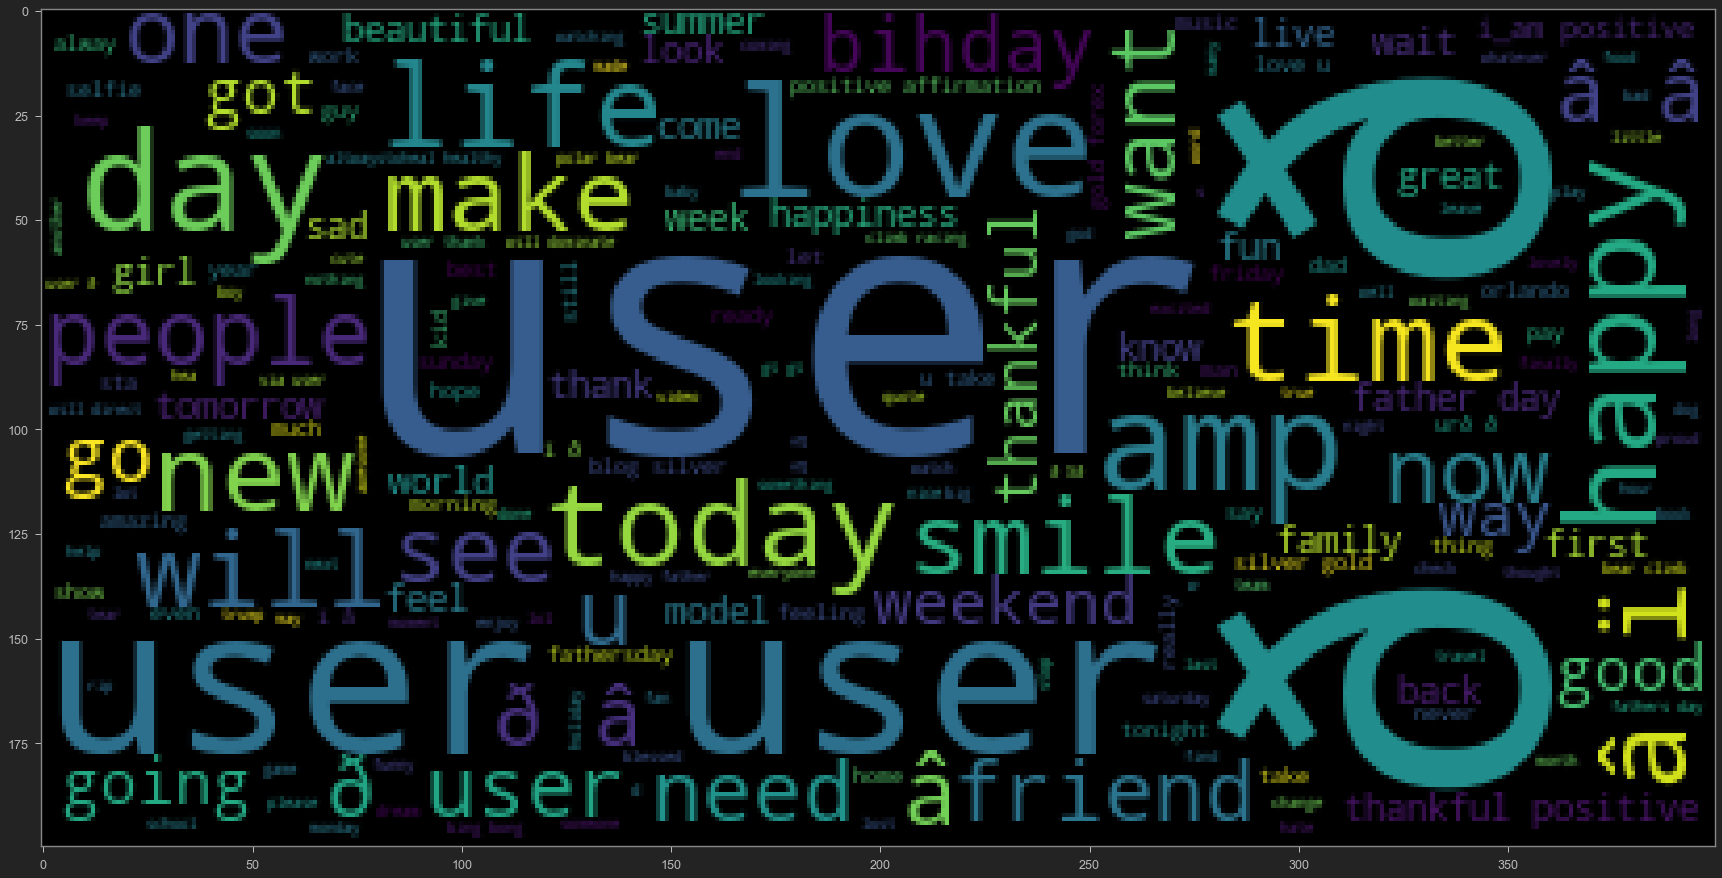

In [32]:
plt.figure(figsize = (30,30))
plt.imshow(WordCloud().generate(pos_tweets_sentences))

In [33]:
#Removal of punctuations in the sentences
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sasi_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
def tweet_clean(message):
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = " ".join(punc_removed)
    punc_removed_join_clean =[word for word in punc_removed_join if word not in stopwords.words('english')]
    return punc_removed_join_clean

In [ ]:
tweet_df_clean = tweet_df['tweet'].apply(tweet_clean)
tweet_df_clean[5]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = tweet_clean, dtype = np.uint8)
tweet_countvectorizer = vectorizer.fit_transform(tweet_df['tweet'])
print(vectorizer.get_feature_names())

In [ ]:
print(tweet_countvectorizer.toarray())

In [ ]:
tweet_countvectorizer.shape

In [ ]:
X = pd.DataFrame(tweet_countvectorizer.toarray())
X

In [ ]:
y = tweet_df['label']

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
NB_classifier = MultinomialDB()
NB_classifier.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot = True)

In [ ]:
print(classification_report(y_test,y_predict_test))